# (1+1)-ES Algorithm

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Step 1: Implement the (1+1)-ES Algorithm
def one_plus_one_es(dim, objective_function, sigma=0.01, iterations=1000):
    # Initialize the solution randomly
    x = np.random.randn(dim)
    # Track the best solution and its objective value
    best_x = x
    best_obj = objective_function(x)
    
    for _ in range(iterations):
        # Mutate the solution
        x_mutated = x + np.random.normal(0, sigma, dim)
        # Evaluate the objective function for the mutated solution
        obj_mutated = objective_function(x_mutated)
        
        # Selection step: if the mutated solution is better, replace the current solution with it
        if obj_mutated < best_obj:
            x = x_mutated
            best_x = x_mutated
            best_obj = obj_mutated
    
    return best_x, best_obj

In [27]:
# Step 2: Define Benchmark Functions
def sphere_function(x):
    return np.sum(x**2)

def rastrigin_function(x):
    return 10 * len(x) + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

In [28]:
# Experiment Parameters
dimensions = [5, 10, 20]
repetitions = 100
results = {}

# Step 3: Experiment Setup
for dim in dimensions:
    results[dim] = {'Sphere': [], 'Rastrigin': []}
    for _ in range(repetitions):
        # Sphere Function
        _, obj_sphere = one_plus_one_es(dim, sphere_function)
        results[dim]['Sphere'].append(obj_sphere)
        
        # Rastrigin Function
        _, obj_rastrigin = one_plus_one_es(dim, rastrigin_function)
        results[dim]['Rastrigin'].append(obj_rastrigin)

# Display initial results
results[dim]['Sphere'][:5], results[dim]['Rastrigin'][:5]


([0.35890170548051825,
  0.05527760591516161,
  0.005774731469663841,
  0.15740350331299252,
  0.20566994600856736],
 [24.159394534042633,
  27.125058679313327,
  14.192994660135554,
  19.159479328350017,
  28.120174095143113])

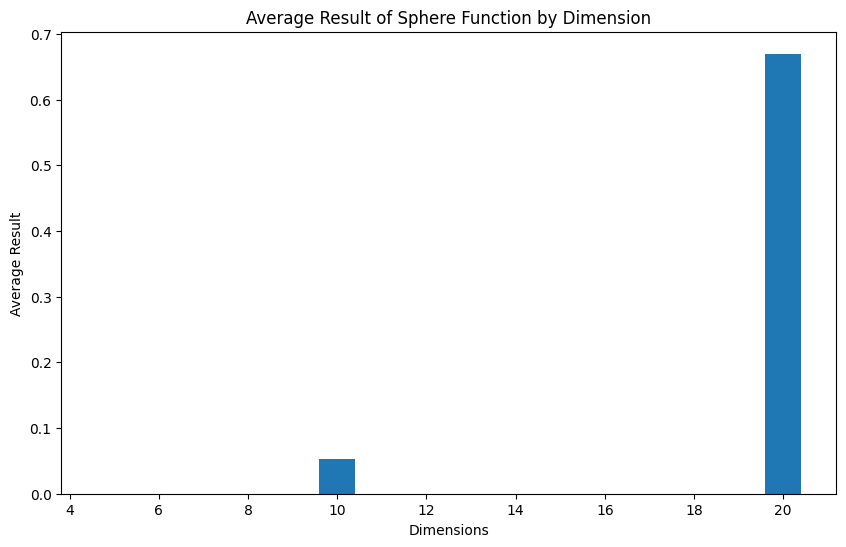

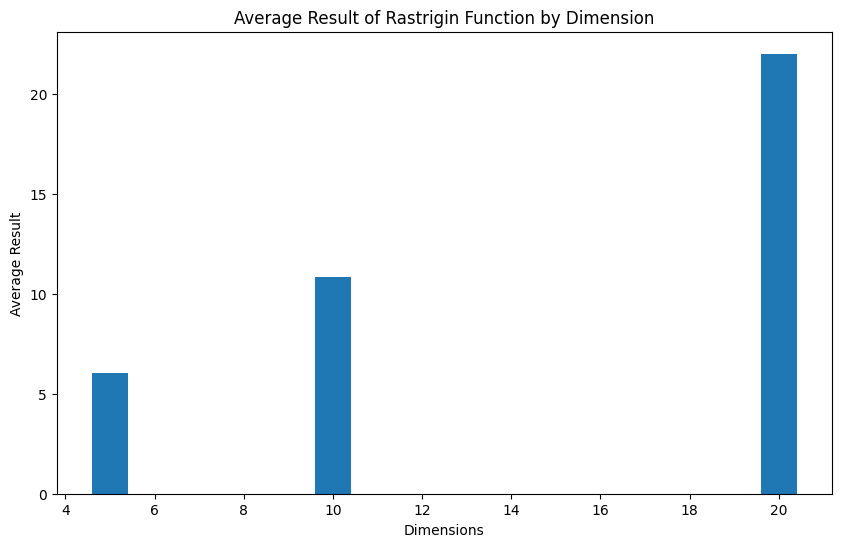

In [29]:
def plot_results(results):
    # Calculate the average results for each dimension and function
    avg_results = {dim: {func: sum(res)/len(res) for func, res in funcs.items()} for dim, funcs in results.items()}

    # Create a bar chart for each function
    for func in ['Sphere', 'Rastrigin']:
        plt.figure(figsize=(10, 6))
        plt.bar(avg_results.keys(), [res[func] for res in avg_results.values()])
        plt.xlabel('Dimensions')
        plt.ylabel('Average Result')
        plt.title(f'Average Result of {func} Function by Dimension')
        plt.show()

plot_results(results)